In [2]:
from importlib import reload

import numpy as np
from matplotlib import pyplot as plt

import spectrum_painting as sp
import spectrum_painting_data as sp_data
import spectrum_painting_plotting as sp_plot
from training.spectrogram import split_spectrogram

In [25]:
# Reload spectrum painting module in case the code changed
# and you want what is executed to be what you wrote.
reload(sp_data)
reload(sp_plot)
reload(sp)

spectrograms = sp_data.load_spectrograms(data_dir="data/numpy",
                                         classes=["ZBW"],
                                         snr_list=[30],
                                         # 20 MHz
                                         sample_rate=20000000,
                                         count=256*256,
                                         window_length=256)


# spectrograms_test = sp_data.load_spectrograms(data_dir="data/numpy-test",
#                                          # classes=["Z", "B", "W", "BW", "ZB", "ZW", "ZBW"],
#                                          classes=["ZBW"],
#                                          snr_list=[30],
#                                          # 20 MHz
#                                          sample_rate=20000000,
#                                          count=500000)

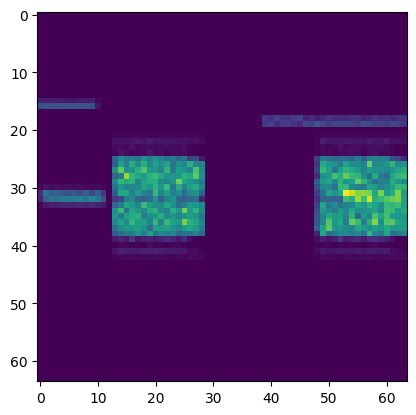

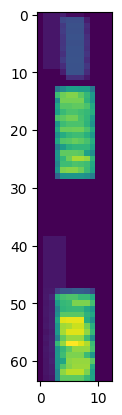

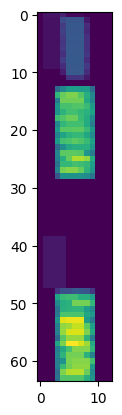

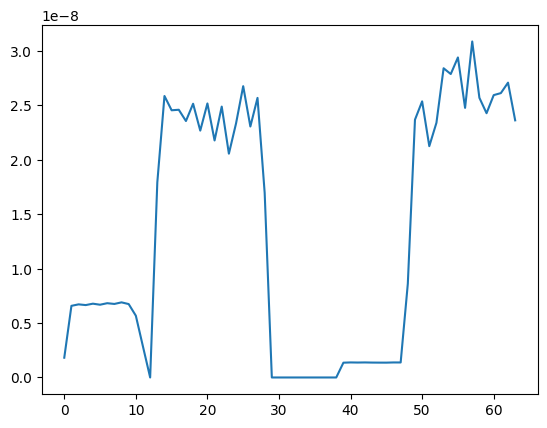

In [27]:
reload(sp_data)
reload(sp_plot)
reload(sp)

spec = spectrograms.get(30)[0].values

downsampled = sp.downsample_spectrogram(spectrogram=spec, resolution=64)
plt.imshow(downsampled)
plt.show()

augmented = sp.augment_spectrogram(spectrogram=downsampled, k=3, l=16, d=4)
plt.imshow(augmented)
plt.show()

painted = sp.paint_spectrogram(original=downsampled, augmented=augmented)
plt.imshow(painted)
plt.show()

plt.plot(np.mean(painted, axis=1))
plt.show()


In [17]:
array = np.array([1, 2, 3])


def add_one(n: int):
    return n + 1

array = add_one(array)

# for n in array:
#     array[n] = array + 1

print(array)

[2 3 4]
